In [17]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [18]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/pyplot-perso")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [19]:
log = lammps_logfile.File("mixing.log")
timestep = 0.001 # ps
time = log.get("Step")*timestep
density = log.get("Density")

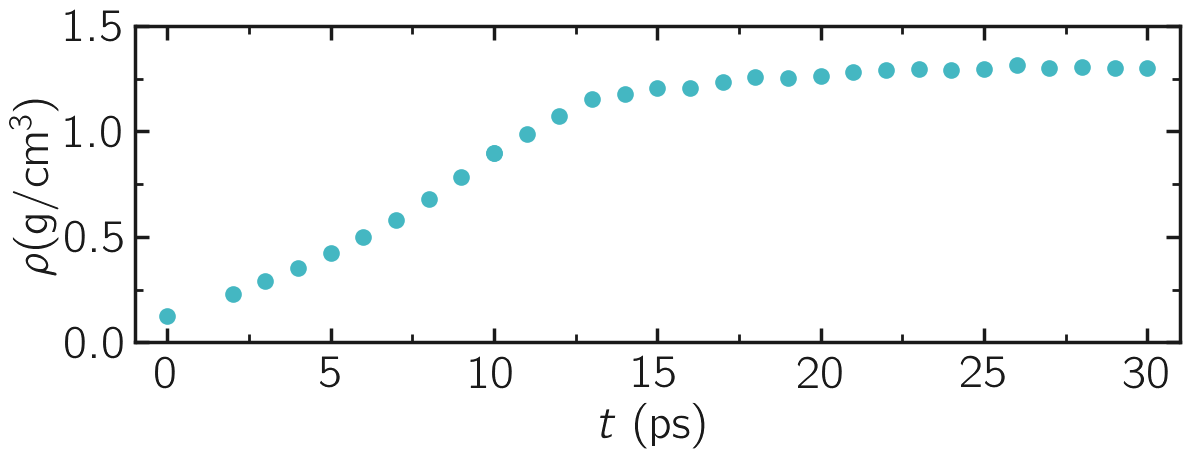

In [32]:
filename = "REACT-mixing"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = False,
                    transparency = False, use_serif=False, n_line=2)
myplt.add_panel()
myplt.add_plot(x = time, y =  density, type = "plot", linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12)
                #data_label = r'$E_{12}$')
myplt.set_boundaries(x_boundaries=(-1, 31), # x_ticks=np.arange(0, 1800, 300)
                     y_boundaries=(0, 1.5), y_ticks=np.arange(0, 1.51, 0.5))
myplt.complete_panel(ylabel = r'$\rho (\mathrm{g}/\mathrm{cm}^3)$', xlabel = r'$t ~ \mathrm{(ps)}$',
                     xpad = 10, legend=False, handlelength_legend=1)
#myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)